In [1]:
from catinous.dataset import BatchDataset, ContinuousDataset
from catinous.dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import catinous.dynamicmemory.DynamicMemoryModel as dmodel
import catinous.utils as cutils
import os
import pandas as pd
from py_jotools import mut, slurm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import torchvision.models as models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from catinous.dataset.ContinuousDataset import *
from catinous.dataset.BatchDataset import *
from torch.utils.data import DataLoader
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import catinous.evalfunctions as evalfu
import pydicom as pyd

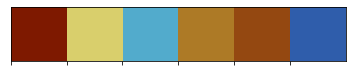

In [2]:
mapname = 'roma'

cm_data = np.loadtxt(f"/home/mperkonigg/Documents/ScientificColourMaps6/{mapname}/{mapname}.txt")
#colormap = LinearSegmentedColormap.from_list('scientific_cm', cm_data)
#x = np.linspace(0, 100, 25)[None, :]
#plt.imshow(x, aspect='auto',cmap=colormap)
#plt.axis('off')
#plt.show()
colormap = ListedColormap([cm_data[0], cm_data[85],cm_data[180], cm_data[45], cm_data[20], cm_data[227]], name='scientific_cm')
matplotlib.cm.register_cmap(cmap=colormap, name='scientific_cm')
sns.set_palette('scientific_cm')
sns.palplot(sns.color_palette())

In [12]:
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

hparams_naive = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130
        }


hparams_128_PD = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_PD_WOTIME ={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_64_PD = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_64_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }

hparams_128_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }

hparams_128_lndb_PD ={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_128_lndb_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order':  ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }


hparams_64_lndb_PD ={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_64_lndb_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order':  ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }

hparams_lndb_naive = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130
        }

hparams_joint_lndb = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': None,
     'noncontinuous_steps': 5000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'lndb'],
    'use_memory': False,
    'val_check_interval': 50
}

hparams_single_lndb = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': 'lndb',
     'noncontinuous_steps': 3000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'lndb'],
    'use_memory': False,
    'val_check_interval': 50
}

In [4]:
def ap_model(hparams, split='test'):
    recalls = {'ges': [], 'geb': [], 'sie': [], 'time_siemens': []}
    precision = {'ges': [], 'geb': [], 'sie': [], 'time_siemens': []}
    device = torch.device('cuda')

    
    model, logs, df_mem, expname = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()

    for res in ['ges', 'geb', 'sie', 'time_siemens']:
        ds_test = LIDCBatch('/project/catinous/lungnodulesfinal.csv', 
                      cropped_to=(288, 288), split=[split], res=res, validation=True)

        iou_thres = 0.4

        overall_true_pos = dict()
        overall_false_pos = dict()
        overall_false_neg = dict()
        overall_boxes_count = dict()
        for k in np.arange(0.0, 1.01, 0.05):
            overall_true_pos[k] = 0
            overall_false_pos[k] = 0
            overall_false_neg[k] = 0
            overall_boxes_count[k] = 0
            

        for batch in ds_test:
            img_batch, annot, res, image = batch
            img_batch = img_batch[None, :, :, :]
            img_batch = img_batch.to(device)

            out = model.model(img_batch)
            out_boxes = [cutils.filter_boxes_area(out[i]['boxes'].cpu().detach().numpy(), out[i]['scores'].cpu().detach().numpy()) for i in range(len(out))]
            boxes_np = [b[0] for b in out_boxes]
            scores_np = [b[1] for b in out_boxes]

            final_boxes, final_scores = cutils.correct_boxes(boxes_np[0], scores_np[0])

            gt = annot['boxes']
            for k in np.arange(0.0, 1.01, 0.05):
                false_positives = 0
                false_negatives = 0
                true_positives = 0
                detected = False
                boxes_count = 0
                if len(final_boxes)>0:
                    for i, b in enumerate(final_boxes):
                        if final_scores[i]>k:
                            boxes_count += 1
                            detected_gt = False
                            for g in gt:
                                if cutils.bb_intersection_over_union(g, b)>iou_thres:
                                    detected = True
                                    detected_gt = True
                            if not detected_gt:
                                false_positives += 1
                    if detected:
                        true_positives += 1
                    else:
                        false_negatives += 1
                overall_true_pos[k] += true_positives
                overall_false_pos[k] += false_positives
                overall_false_neg[k] += false_negatives
                overall_boxes_count[k] += boxes_count
        for k in np.arange(0.0, 1.01, 0.05):
            if (overall_false_neg[k]+overall_true_pos[k])==0:
                recalls[res].append(0.0)
            else:
                recalls[res].append(overall_true_pos[k]/(overall_false_neg[k]+overall_true_pos[k]))
            if (overall_false_pos[k]+overall_true_pos[k])==0:
                precision[res].append(0.0)
            else:
                precision[res].append(overall_true_pos[k]/(overall_false_pos[k]+overall_true_pos[k]))
    return recalls, precision

def get_ap_for_res(hparams, split='test'):
    recalls, precisions = ap_model(hparams, split)
    
    aps = dict()
    for res in ['ges', 'geb', 'sie', 'time_siemens']:
        prec = np.array(precisions[res])
        rec = np.array(recalls[res])
        ap = []
        for t in np.arange(0.0, 1.01, 0.1):
            prec_arr = prec[rec>t]
            if len(prec_arr)==0:
                ap.append(0.0)
            else:
                ap.append(prec_arr.max())
        aps[res] = np.array(ap).mean()
    return aps

In [6]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 8,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         #'pseudodomain_detection': True
        }

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
aps = get_ap_for_res(hparams, split='val')

expname lidc_cont_lungnodulesfinalpatientsplit_basemodel_batch_mem_tf08_1_64dc79fc9e
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinalpatientsplit_basemodel_batch_mem_tf08_1_64dc79fc9e.pt


In [5]:
#test
aps

{'ges': 0.7675628552498519,
 'geb': 0.49007974481658695,
 'sie': 0.6233766233766234,
 'time_siemens': 0.1405334861217214}

In [7]:
#val
aps

{'ges': 0.8492360371455931,
 'geb': 0.7181883772792863,
 'sie': 0.5938934802571166,
 'time_siemens': 0.20903525158844305}

In [9]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': 'ges',
    'val_check_interval': 50,
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'order': ['ges', 'geb', 'sie', 'time_siemens'],
    'use_memory': False
}



hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
aps = get_ap_for_res(hparams)

lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65
Read: /project/catinous/trained_models/lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt


In [10]:
aps

{'ges': 0.7944284768055261,
 'geb': 0.5943468296409473,
 'sie': 0.8780594405594406,
 'time_siemens': 0.21996451183054055}

In [3]:
hparams = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'time_siemens'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

hparams['seed'] = seeds[0]
hparams['run_postfix'] = 1
model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)

expname lidc_cont_lungnodulesfinalpatientsplit_basemodel_batch_mem_tf08_1_5ec40ddbfc
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinalpatientsplit_basemodel_batch_mem_tf08_1_5ec40ddbfc.pt


In [8]:
def res_data_for_params(hparams, seeds=None):
    df = pd.DataFrame()
    hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
    if seeds is None:        
        exp_name = cutils.get_expname(hparams)

        max_version = max([int(x.split('_')[1]) for x in os.listdir(cutils.LOGGING_FOLDER + exp_name)])
        df_temp = pd.read_csv(cutils.LOGGING_FOLDER + exp_name + '/version_{}/metrics.csv'.format(max_version))

        df_temp = df_temp.loc[df_temp['val_ap_geb']==df_temp['val_ap_geb']]
        df_temp['idx'] = range(1,len(df_temp)+1)
        df = df.append(df_temp)
    else:
        for i, seed in enumerate(seeds):
            hparams['seed'] = seed
            hparams['run_postfix'] = i+1
            exp_name = cutils.get_expname(hparams)
            max_version = max([int(x.split('_')[1]) for x in os.listdir(cutils.LOGGING_FOLDER + exp_name)])
            df_temp = pd.read_csv(cutils.LOGGING_FOLDER + exp_name + '/version_{}/metrics.csv'.format(max_version))

            df_temp = df_temp.loc[df_temp['val_ap_geb']==df_temp['val_ap_geb']]
            df_temp['idx'] = range(1,len(df_temp)+1)
            df = df.append(df_temp)
    #if os.path.exists(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv'):
    #    df_mem = pd.read_csv(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv')
    #else:
    #    print(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv', 'not existing')
    #    df_mem = None

    return df#, df_mem

ds = LIDCContinuous('/project/catinous/lungnodulesfinallndbBig.csv', seed=1654130, order=['ges', 'geb', 'sie', 'lndb'], transition_phase_after=0.8)
res = ds.df.scanner == 'ges'
res1 = ds.df.scanner == 'geb'
res2 = ds.df.scanner == 'sie'
res3 = ds.df.scanner == 'lndb'
res[res1] = 2
res[res2] = 3
res[res3] = 4

['ges', 'geb', 'sie', 'lndb']


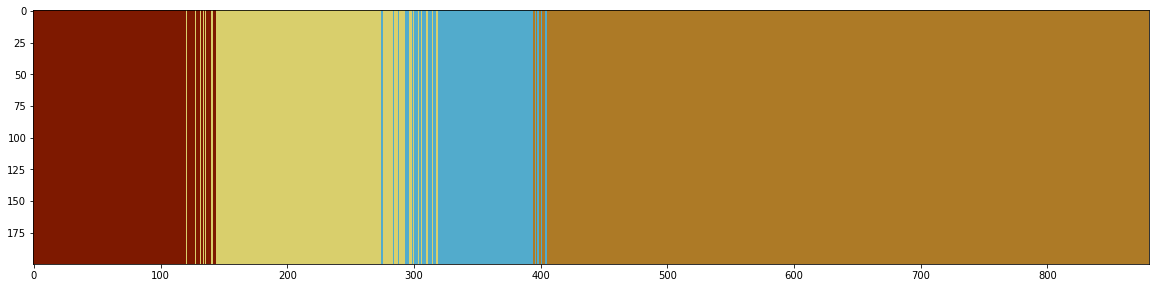

In [81]:
plt.figure(figsize=(20, 10))
plt.imshow(np.tile(res,(200,1)), cmap=ListedColormap(colormap.colors[:4]))
plt.savefig(cutils.RESPATH + 'naturecomm_figures/timeline.pdf')

In [19]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]
df = res_data_for_params(hparams, seeds=seeds)

In [43]:
df

created_at  epoch  train_loss  val_ap_geb  val_ap_ges  \
0   2021-02-05 11:11:59.690241    NaN         NaN    0.403243    0.612775   
1   2021-02-05 11:12:17.556891    NaN         NaN    0.383242    0.624482   
2   2021-02-05 11:12:36.022746    NaN         NaN    0.451147    0.631392   
3   2021-02-05 11:12:55.494591    NaN         NaN    0.369875    0.563636   
5   2021-02-05 11:13:14.147417    NaN         NaN    0.533206    0.654639   
..                         ...    ...         ...         ...         ...   
20  2021-02-05 11:21:23.865204    NaN         NaN    0.751292    0.621237   
21  2021-02-05 11:21:40.914906    NaN         NaN    0.759468    0.595078   
23  2021-02-05 11:21:58.156899    NaN         NaN    0.758978    0.634117   
24  2021-02-05 11:22:15.129550    NaN         NaN    0.747963    0.598045   
25  2021-02-05 11:22:31.980128    NaN         NaN    0.745041    0.587413   

    val_ap_lndb  val_ap_sie  idx  
0      0.131032    0.599650    1  
1      0.122947    0.593357    2  
2      0.133659    0.646743    3  
3      0.122009    0.628596    4  
5      0.140875    0.723026    5  
..          ...         ...  ...  
20     0.244085    0.851515   18  
21     0.249039    0.847727   19  
23     0.250972    0.860606   20  
24     0.251352    0.851515   21  
25     0.263818    0.868687   22  

[108 rows x 8 columns]

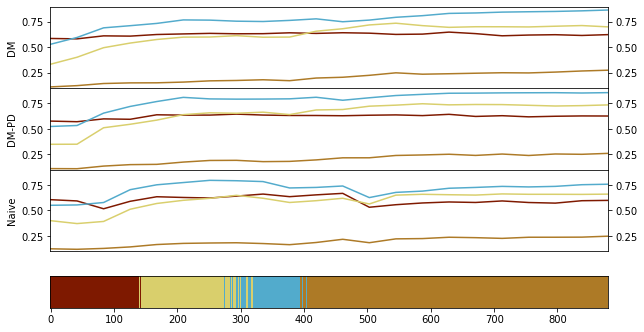

In [10]:
val_measure = 'val_ap'
fig, axes = plt.subplots(4, 1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.0)

names = ['DM', 'DM-PD', 'Naive']
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, hparams in enumerate([hparams_128_lndb_DM, hparams_128_lndb_PD, hparams_lndb_naive]):
    df = res_data_for_params(hparams, seeds=seeds)

    ax = axes[i]
    for scanner in hparams['order']:
        sns.lineplot(data=df, y=f'{val_measure}_{scanner}', x='idx', err_style=None, ax=ax, label=scanner)
    ax.set_ylim(0.10, 0.9)
    ax.set_yticks([0.25, 0.50, 0.75])
    ax.get_xaxis().set_visible(False)
    ax.get_legend().remove()
    ax.set_xlim(1, 22)
    ax.set_ylabel(names[i])
    ax.tick_params(labelright=True, right=True)

axes[-1].imshow(np.tile(res,(50,1)), cmap=ListedColormap(colormap.colors[:4]))
axes[-1].get_yaxis().set_visible(False)
axes[-1].get_yaxis()
plt.savefig(cutils.RESPATH + 'naturecomm_figures/lidc_validationcurves_naiveupdate.pdf')

In [4]:
df_overall = pd.DataFrame()

In [ ]:
df_overview = df_overall.groupby(['model', 'scanner']).mean().reset_index()
df_overview.pivot(index='model', columns='scanner', values='mean').round(3)

In [32]:
hparams_set = [hparams_naive, hparams_128_DM, hparams_128_PD, hparams_64_DM, hparams_64_PD, hparams_DM_WOTIME, hparams_PD_WOTIME]

names = ['Naive', '128 DM', '128 PD', '64 DM', '64 PD', 'DM WO TIME', 'PD WO TIME']

#hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

df_overall = pd.DataFrame()

for k, hparams in enumerate(hparams_set):
    print(names[k])
    df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
    for seed in seeds:
        df_bwt_fwt = df_res.loc[df_res.seed==seed].reset_index(drop=True)
        if names[k] == 'DM WO TIME' or names[k] == 'PD WO TIME':
            order=['ges', 'geb', 'sie']
        else:
            order = ['ges', 'geb', 'sie', 'time_siemens']
        bwt = 0.0
        fwt = 0.0

        for i in range(len(order)-1):
            bwt += df_bwt_fwt.loc[df_bwt_fwt['shift']=='None'][order[i]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i+1]][order[i]].values[0]
        if names[k] == 'DM WO TIME' or names[k] == 'PD WO TIME':
            order=['ges', 'geb', 'sie', 'None']
        else:
            order = ['ges', 'geb', 'sie', 'time_siemens', 'None']

        for i in range(2, len(order)):
            fwt += df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i]][order[i-1]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[1]][order[i-1]].values[0]

        bwt /= len(order)-1
        fwt /= len(order)-1
        df_res = df_res.append(pd.DataFrame({'shift':['BWT', 'FWT'], 
                                    'ges':[bwt, fwt], 
                                    'geb':[0, 0], 
                                    'sie':[0, 0],
                                    'time_siemens':[0, 0]}))

    df_res['name'] = names[k]

    df_overall = df_overall.append(df_res)

Naive
128 DM
128 PD
64 DM
64 PD
DM WO TIME
PD WO TIME


In [33]:
df_overall.groupby(['shift', 'name']).mean().round(3)[['ges', 'geb', 'sie', 'time_siemens']]

ges    geb    sie  time_siemens
shift        name                                         
BWT          128 DM      0.034  0.000  0.000         0.000
             128 PD      0.038  0.000  0.000         0.000
             64 DM       0.029  0.000  0.000         0.000
             64 PD       0.022  0.000  0.000         0.000
             DM WO TIME  0.003  0.000  0.000         0.000
             Naive      -0.019  0.000  0.000         0.000
             PD WO TIME  0.007  0.000  0.000         0.000
FWT          128 DM      0.041  0.000  0.000         0.000
             128 PD      0.042  0.000  0.000         0.000
             64 DM       0.041  0.000  0.000         0.000
             64 PD       0.033  0.000  0.000         0.000
             DM WO TIME  0.051  0.000  0.000         0.000
             Naive       0.056  0.000  0.000         0.000
             PD WO TIME  0.060  0.000  0.000         0.000
None         128 DM      0.690  0.476  0.698         0.250
             128 PD      0.691  0.519  0.703         0.269
             64 DM       0.666  0.504  0.720         0.246
             64 PD       0.653  0.501  0.690         0.249
             DM WO TIME  0.810  0.471  0.663           NaN
             Naive       0.577  0.511  0.608         0.260
             PD WO TIME  0.812  0.516  0.665           NaN
geb          128 DM      0.663  0.261  0.676         0.215
             128 PD      0.674  0.259  0.706         0.221
             64 DM       0.669  0.279  0.682         0.226
             64 PD       0.666  0.286  0.703         0.219
             DM WO TIME  0.794  0.388  0.598           NaN
             Naive       0.662  0.240  0.706         0.200
             PD WO TIME  0.800  0.405  0.584           NaN
sie          128 DM      0.682  0.373  0.674         0.266
             128 PD      0.689  0.379  0.729         0.261
             64 DM       0.695  0.385  0.721         0.275
             64 PD       0.688  0.377  0.705         0.284
             DM WO TIME  0.810  0.477  0.617           NaN
             Naive       0.695  0.410  0.728         0.298
             PD WO TIME  0.812  0.505  0.610           NaN
time_siemens 128 DM      0.687  0.387  0.692         0.250
             128 PD      0.704  0.401  0.708         0.250
             64 DM       0.701  0.390  0.718         0.235
             64 PD       0.686  0.390  0.714         0.240
             Naive       0.690  0.420  0.700         0.281

In [11]:
df_res.groupby('shift').mean().round(3)

geb    ges    sie  time_siemens       seed
shift                                                     
BWT           0.000  0.038  0.000         0.000        NaN
FWT           0.000  0.042  0.000         0.000        NaN
None          0.519  0.691  0.703         0.269  3095246.4
geb           0.259  0.674  0.706         0.221  3095246.4
sie           0.379  0.689  0.729         0.261  3095246.4
time_siemens  0.401  0.704  0.708         0.250  3095246.4

In [14]:
hparams_set = [hparams_lndb_naive, hparams_128_lndb_DM, hparams_128_lndb_PD, hparams_64_lndb_DM]#, hparams_64_lndb_PD]

names = ['Naive', '128 DM', '128 PD', '64 DM', '64 PD']

#hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

df_overall = pd.DataFrame()

for k, hparams in enumerate(hparams_set):
    print(names[k])
    df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
    for seed in seeds:
        df_bwt_fwt = df_res.loc[df_res.seed==seed].reset_index(drop=True)

        order = ['ges', 'geb', 'sie', 'lndb']
        bwt = 0.0
        fwt = 0.0

        for i in range(len(order)-1):
            bwt += df_bwt_fwt.loc[df_bwt_fwt['shift']=='None'][order[i]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i+1]][order[i]].values[0]

        order = ['ges', 'geb', 'sie', 'lndb', 'None']

        for i in range(2, len(order)):
            fwt += df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i]][order[i-1]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[1]][order[i-1]].values[0]

        bwt /= len(order)-1
        fwt /= len(order)-1
        df_res = df_res.append(pd.DataFrame({'shift':['BWT', 'FWT'], 
                                    'ges':[bwt, fwt], 
                                    'geb':[0, 0], 
                                    'sie':[0, 0],
                                    'lndb':[0, 0]}))

    df_res['name'] = names[k]

    df_overall = df_overall.append(df_res)

Naive
128 DM
128 PD
64 DM


In [72]:
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams_joint_lndb)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb     0.598
 ges     0.714
 lndb    0.375
 sie     0.770
 dtype: float64,
 geb     0.036
 ges     0.044
 lndb    0.021
 sie     0.024
 dtype: float64)

In [92]:
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams_lndb_naive)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb           0.335
 ges           0.594
 lndb          0.158
 sie           0.609
 seed    3095246.400
 dtype: float64,
 geb           0.156
 ges           0.198
 lndb          0.066
 sie           0.215
 seed    2694283.963
 dtype: float64)

In [84]:
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams_single_lndb)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb     0.447
 ges     0.399
 lndb    0.317
 sie     0.509
 dtype: float64,
 geb     0.136
 ges     0.116
 lndb    0.053
 sie     0.160
 dtype: float64)

In [15]:
df_overall.groupby(['shift', 'name']).mean().round(3)[['ges', 'geb', 'sie', 'lndb']]

ges    geb    sie   lndb
shift name                              
BWT   128 DM  0.070  0.000  0.000  0.000
      128 PD  0.073  0.000  0.000  0.000
      64 DM   0.068  0.000  0.000  0.000
      Naive   0.056  0.000  0.000  0.000
FWT   128 DM  0.061  0.000  0.000  0.000
      128 PD  0.070  0.000  0.000  0.000
      64 DM   0.055  0.000  0.000  0.000
      Naive   0.102  0.000  0.000  0.000
None  128 DM  0.741  0.544  0.758  0.269
      128 PD  0.729  0.600  0.756  0.281
      64 DM   0.729  0.571  0.744  0.276
      Naive   0.648  0.505  0.666  0.273
geb   128 DM  0.676  0.301  0.678  0.132
      128 PD  0.667  0.291  0.702  0.132
      64 DM   0.673  0.290  0.730  0.132
      Naive   0.561  0.227  0.556  0.116
lndb  128 DM  0.697  0.374  0.709  0.152
      128 PD  0.696  0.388  0.718  0.173
      64 DM   0.696  0.382  0.711  0.150
      Naive   0.674  0.334  0.669  0.166
sie   128 DM  0.677  0.378  0.690  0.163
      128 PD  0.698  0.409  0.714  0.188
      64 DM   0.690  0.386  0.692  0.161
      Naive   0.673  0.365  0.694  0.196

In [16]:
df_overall.groupby(['shift', 'name']).std().round(3)[['ges', 'geb', 'sie', 'lndb']]

ges    geb    sie   lndb
shift name                              
BWT   128 DM  0.017  0.000  0.000  0.000
      128 PD  0.020  0.000  0.000  0.000
      64 DM   0.016  0.000  0.000  0.000
      Naive   0.022  0.000  0.000  0.000
FWT   128 DM  0.032  0.000  0.000  0.000
      128 PD  0.012  0.000  0.000  0.000
      64 DM   0.009  0.000  0.000  0.000
      Naive   0.046  0.000  0.000  0.000
None  128 DM  0.022  0.025  0.039  0.023
      128 PD  0.011  0.025  0.038  0.029
      64 DM   0.011  0.019  0.031  0.020
      Naive   0.165  0.167  0.148  0.043
geb   128 DM  0.026  0.050  0.048  0.028
      128 PD  0.044  0.037  0.056  0.013
      64 DM   0.017  0.023  0.050  0.009
      Naive   0.236  0.064  0.282  0.027
lndb  128 DM  0.019  0.038  0.042  0.017
      128 PD  0.014  0.036  0.030  0.002
      64 DM   0.010  0.066  0.027  0.023
      Naive   0.022  0.067  0.074  0.021
sie   128 DM  0.012  0.018  0.043  0.009
      128 PD  0.005  0.055  0.016  0.013
      64 DM   0.017  0.052  0.011  0.016
      Naive   0.054  0.095  0.054  0.015

In [35]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': None,
     'noncontinuous_steps': 5000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'time_siemens'],
    'use_memory': False,
    'val_check_interval': 50
}

df_base = pd.DataFrame()
for scanner in [None, 'ges', 'geb', 'sie', 'time_siemens']:
    hparams['scanner'] = scanner
    aps = evalfu.get_ap_for_res(hparams, split='test')
    aps['scanner'] = scanner
    df_base = df_base.append(aps)

expname lidc_batch_lungnodulesfinalpatientsplit_base-train_1_ea03d7c711
Read: /project/catinous/trained_models/lidc_batch_lungnodulesfinalpatientsplit_base-train_1_ea03d7c711.pt


KeyboardInterrupt: 

In [8]:
df_base

ges       geb       sie  time_siemens       scanner
0  0.635803  0.474892  0.705062      0.088436          None
0  0.715713  0.562492  0.710483      0.119304           ges
0  0.679698  0.572404  0.747344      0.221173           geb
0  0.759938  0.667521  0.758838      0.161504           sie
0  0.640198  0.433477  0.642496      0.290319  time_siemens

In [13]:
ds = LIDCContinuous('/project/catinous/lungnodulesfinalpatientsplit.csv', seed=1654130)
res = ds.df.scanner == 'ges'
res1 = ds.df.scanner == 'geb'
res2 = ds.df.scanner == 'sie'
res3 = ds.df.scanner == 'time_siemens'
res[res1] = 2
res[res2] = 3
res[res3] = 4

In [12]:
ds.df.loc[ds.df.scanner=='ges'].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 122, 123, 124, 126, 127, 129, 130, 131, 133,
       135, 137, 138, 139, 142, 143])

In [ ]:
ds.df.loc[ds.df.scanner=='ges'].index.values

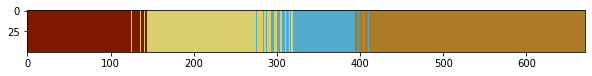

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(np.tile(res,(50,1)), cmap=ListedColormap(colormap.colors[:4]))


In [10]:
ds.df.loc[ds.df.scanner=='ges']

dataset scanner      patient_id  \
0      lidc     ges  LIDC-IDRI-0399   
1      lidc     ges  LIDC-IDRI-0046   
2      lidc     ges  LIDC-IDRI-0722   
3      lidc     ges  LIDC-IDRI-0947   
4      lidc     ges  LIDC-IDRI-0187   
..      ...     ...             ...   
137    lidc     ges  LIDC-IDRI-0158   
138    lidc     ges  LIDC-IDRI-0055   
139    lidc     ges  LIDC-IDRI-0206   
142    lidc     ges  LIDC-IDRI-1004   
143    lidc     ges  LIDC-IDRI-0722   

                                                 image     x1     x2     y1  \
0    /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  171.0  179.0  154.0   
1    /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  426.0  433.0  327.0   
2    /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  395.0  405.0  262.0   
3    /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...   95.0  105.0  265.0   
4    /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  342.0  366.0  267.0   
..                                                 ...    ...    ...    ...   
137  /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  280.0  287.0  289.0   
138  /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  341.0  352.0  202.0   
139  /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  195.0  201.0  270.0   
142  /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  159.0  169.0  146.0   
143  /data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...  421.0  429.0  244.0   

        y2  bin_malignancy  split  
0    162.0               0  train  
1    334.0               0  train  
2    272.0               1  train  
3    275.0               1  train  
4    291.0               1  train  
..     ...             ...    ...  
137  296.0               1  train  
138  213.0               1  train  
139  276.0               1  train  
142  156.0               1  train  
143  252.0               1  train  

[136 rows x 10 columns]

## Memory evaluation 

In [47]:
def get_memory_dist(hparams, seeds):
    hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

    df_mem_eval = pd.DataFrame()
    df_mems = []
    for k, seed in enumerate(seeds):
        hparams['seed'] = seed
        hparams['run_postfix'] = k+1
        exp_name = cutils.get_expname(hparams)
        if os.path.exists(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv'):
            df_mem = pd.read_csv(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv')
            df_mems.append(df_mem)
            df_mem_grp = df_mem.groupby('scanner').count().reset_index()
            df_mem_eval = df_mem_eval.append(df_mem_grp)
        else:
            print(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv', 'not existing')
            df_mem = None
    return df_mem_eval, df_mems

In [26]:
df_mem_eval, df_mems = get_memory_dist(hparams_64_DM, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  pseudo_domain  traincounter
scanner                                            
geb                4.0            0.0           4.0
ges               31.4            0.0          31.4
sie               17.6            0.0          17.6
time_siemens      11.0            0.0          11.0

In [25]:
df_mem_eval, df_mems = get_memory_dist(hparams_64_PD, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  pseudo_domain  traincounter
scanner                                            
geb               13.4           13.4          13.4
ges               20.8           20.8          20.8
sie               15.0           15.0          15.0
time_siemens      14.8           14.8          14.8

In [27]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_DM, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  traincounter  pseudo_domain
scanner                                            
geb                4.8           4.8            0.0
ges               83.4          83.4            0.0
sie               25.6          25.6            0.0
time_siemens      14.2          14.2            0.0

In [28]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_PD, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  pseudo_domain  traincounter
scanner                                            
geb               38.4           38.4          38.4
ges               43.0           43.0          43.0
sie               21.0           21.0          21.0
time_siemens      25.6           25.6          25.6

In [50]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_lndb_PD, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  pseudo_domain  traincounter
scanner                                       
geb          41.4           41.4          41.4
ges          28.0           28.0          28.0
lndb         46.8           46.8          46.8
sie          11.8           11.8          11.8

In [63]:
df_mems[2].groupby(['pseudo_domain', 'scanner']).count()

filepath  traincounter
pseudo_domain scanner                        
0             ges            21            21
              lndb            3             3
              sie             1             1
1             geb            15            15
              ges             1             1
              lndb           11            11
              sie             3             3
2             geb             1             1
              ges             4             4
              lndb            4             4
              sie             7             7
3             geb            20            20
              lndb            9             9
4             lndb           28            28

In [64]:
df_mems[2].groupby(['scanner']).count()

filepath  pseudo_domain  traincounter
scanner                                       
geb            36             36            36
ges            26             26            26
lndb           55             55            55
sie            11             11            11

In [49]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_lndb_DM, seeds)
df_mem_eval.groupby('scanner').mean()

filepath  pseudo_domain  traincounter
scanner                                       
geb           4.4            0.0           4.4
ges          78.8            0.0          78.8
lndb         27.8            0.0          27.8
sie          17.0            0.0          17.0

# example detections

In [5]:
hparams_set = [hparams_naive, hparams_128_DM, hparams_128_PD]

seeds = [1654130, 6654961, 5819225, 1215862, 132054]


In [6]:
dl_ges = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='ges', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_geb = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='geb', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_sie = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='sie', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_time = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='time_siemens', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

In [ ]:
device = torch.device('cuda')
#model.to(device)
#model.eval()

idx = 0

x, y_ges, scanner, filepath_ges = next(iter(dl_ges))
x_ges = list(i.to(device) for i in x)

x, y_geb, scanner, filepath_geb = next(iter(dl_geb))
x_geb = list(i.to(device) for i in x)

x, y_sie, scanner, filepath_sie = next(iter(dl_sie))
x_sie = list(i.to(device) for i in x)

x, y_time, scanner, filepath_time = next(iter(dl_time))
x_time = list(i.to(device) for i in x)

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)

ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)

idx = 1
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
idx = 2
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
idx = 3
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
#plt.savefig(cutils.RESPATH + 'lidc/samples_detection.pdf')

In [17]:
ges_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0982/01-01-2000-11033/30786-26530/000407.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0148/01-01-2000-CT THORAX WCONTRAST-41427/3-Recon 2 CHEST-05032/000112.dcm']

geb_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0884/01-01-2000-CT LUNG SCREEN-63626/2-46335/000089.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0591/01-01-2000-CT LUNG SCREEN-70869/13511/000136.dcm']

sie_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0380/01-01-2000-50111/3000012-34623/000037.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0637/01-01-2000-58715/1731-NLST TLC VOL B30F-19780/000273.dcm']

lndb_imgs = ['/data/dataset/external/LNDb/dicom/LNDb-0018-0170.dcm',
            '/data/dataset/external/LNDb/dicom/LNDb-0162-0116.dcm']
pltimgs = []
pltimgs.extend(ges_imgs)
pltimgs.extend(geb_imgs)
pltimgs.extend(sie_imgs)
pltimgs.extend(lndb_imgs)

In [18]:
df_temp = pd.read_csv('/project/catinous/lungnodulesfinallndbBig.csv')
df_plt = pd.DataFrame()
for p in pltimgs:
    df_plt = df_plt.append(df_temp.loc[df_temp.image==p])
df_plt = df_plt.drop(208)
df_plt.reset_index(drop=True).to_csv('plt_lungnodules.csv', index=False)

In [20]:
device = torch.device('cuda')
dl_plt = DataLoader(LIDCBatch('plt_lungnodules.csv',
                                      split='test', validation=True, iterations=None),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=False)
x_plt, y_plt, scanner_plt, filepath_plt = next(iter(dl_plt))
x_plt = list(i.to(device) for i in x_plt)

expname lidc_cont_lungnodulesfinallndbBig_basemodel_batch_nomem_tf08_1_00ffcf375b
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_nomem_tf08_1_00ffcf375b.pt
expname lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_adf8e31abd
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_adf8e31abd.pt
expname lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_580ba215d9
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_580ba215d9.pt


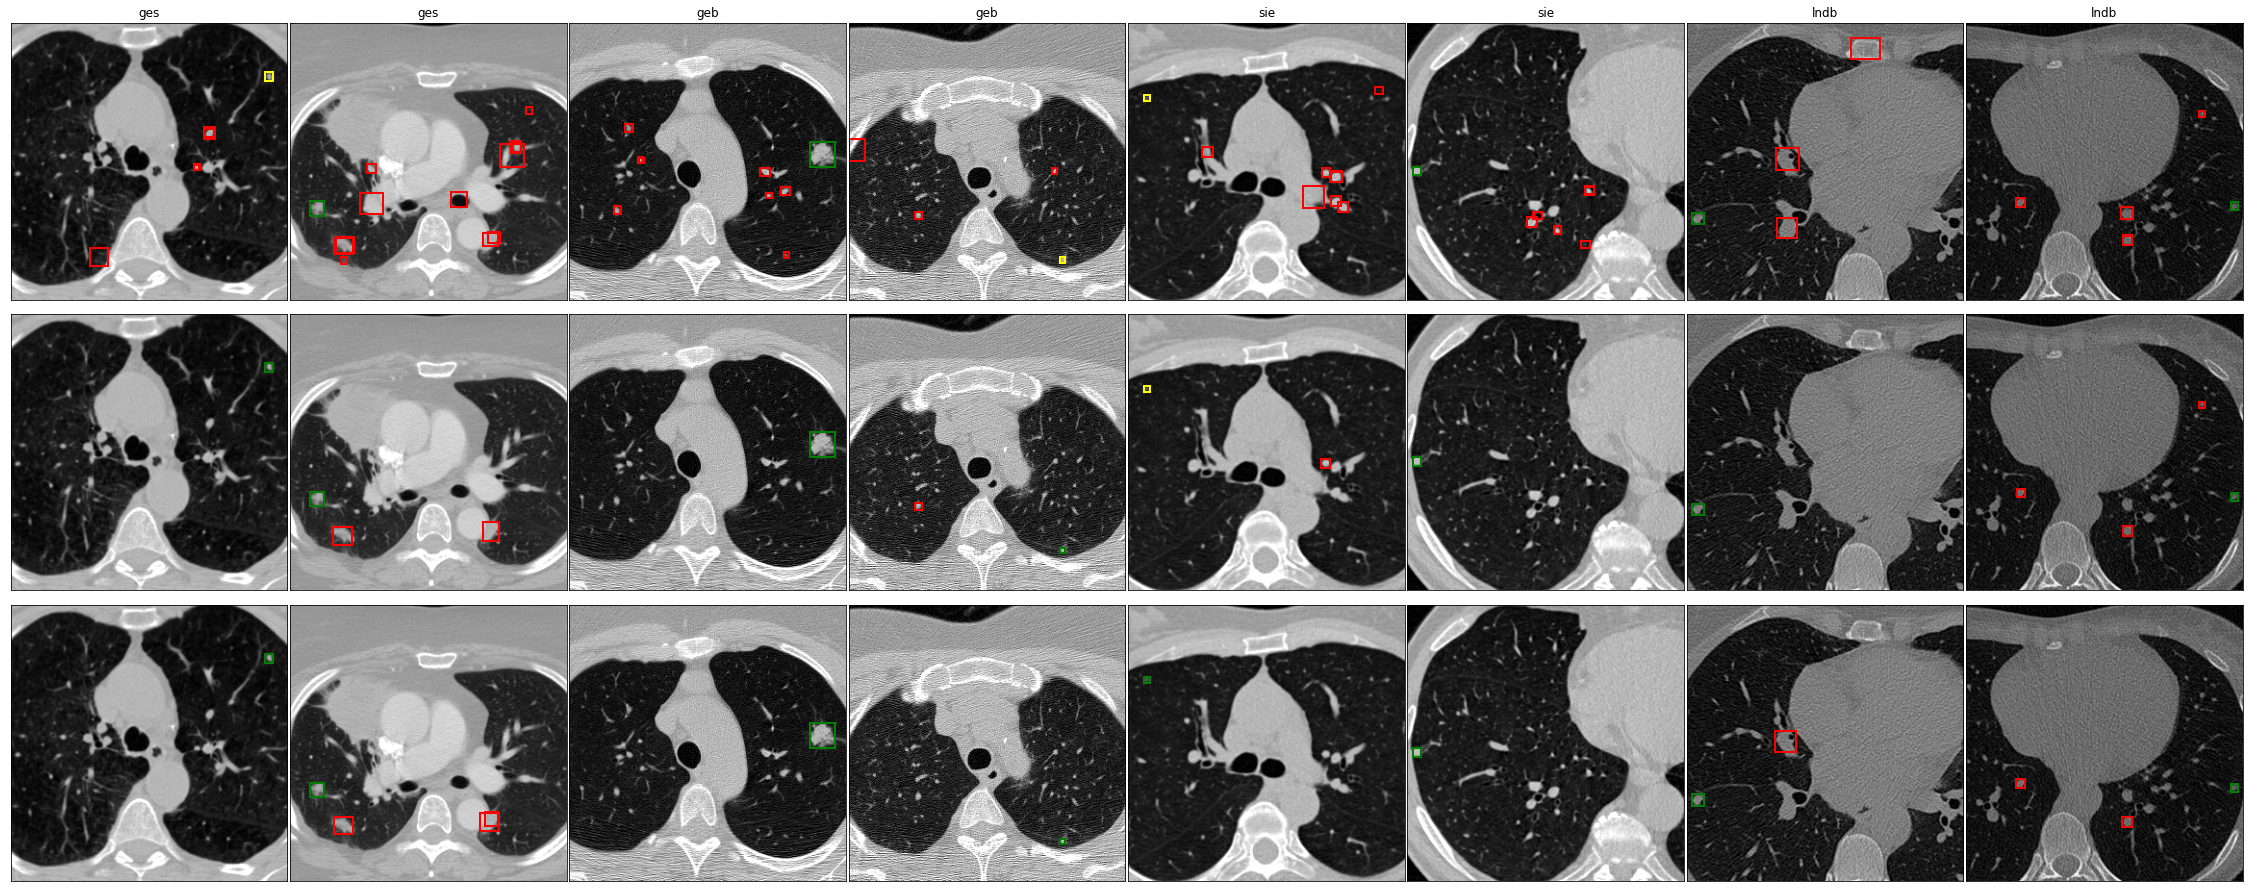

In [30]:
hparams_set = [hparams_lndb_naive, hparams_128_lndb_DM, hparams_128_lndb_PD]

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

fig, ax = plt.subplots(3, 8, figsize=(40, 16))
plt.subplots_adjust(hspace=0.01, wspace=0.01)

iou_thres = 0.3

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    out = model.forward(x_plt)
    
    for j in range(8):      
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[j]['boxes']]

        ax[i][j].imshow(x_plt[j].detach().cpu().numpy()[0])
        for gt in y_plt[j]['boxes']:
            tp = False
            for ab in out[j]['boxes']:
                if (cutils.bb_intersection_over_union(gt, ab))>iou_thres:
                    tp = True
            color = 'green' if tp else 'yellow'
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor=color, facecolor='none')
            ax[i][j].add_patch(rect)
        for k, xy in enumerate(xywh):
            if xy[0]+xy[2]<=280 and xy[1]+xy[3]<=280:
                tp = False
                for gt in y_plt[j]['boxes']:
                    if (cutils.bb_intersection_over_union(gt, out[j]['boxes'][k]))>iou_thres:
                        tp = True
                if not tp:
                    rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
                    ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        if i==0:
            ax[i][j].set_title(scanner_plt[j])
plt.savefig(cutils.RESPATH + 'naturecomm_figures/LN_detection_samples_update.pdf')

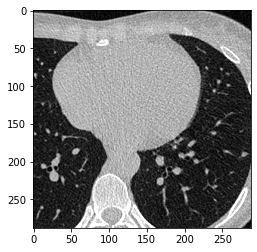

In [29]:
plt.imshow(x_plt[j].detach().cpu().numpy()[0], vmax=0.6)

In [14]:
dl_lndb = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinallndb.csv',
                                      split=['test'], res='lndb', validation=True),
                      batch_size=8,
                      collate_fn=cutils.collate_fn)

In [5]:
device =torch.device('cuda')

model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams_128_lndb_PD, training=False)
model.to(device)
model.eval()
print('.')

expname lidc_cont_lungnodulesfinallndb_basemodel_batch_mem_tf08_1_f7e22510d8
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndb_basemodel_batch_mem_tf08_1_f7e22510d8.pt
.


('lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb')
('/data/dataset/external/LNDb/dicom/LNDb-0102-0233.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0248.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0258.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0236.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0214.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0226.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0115.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0109-0210.dcm')


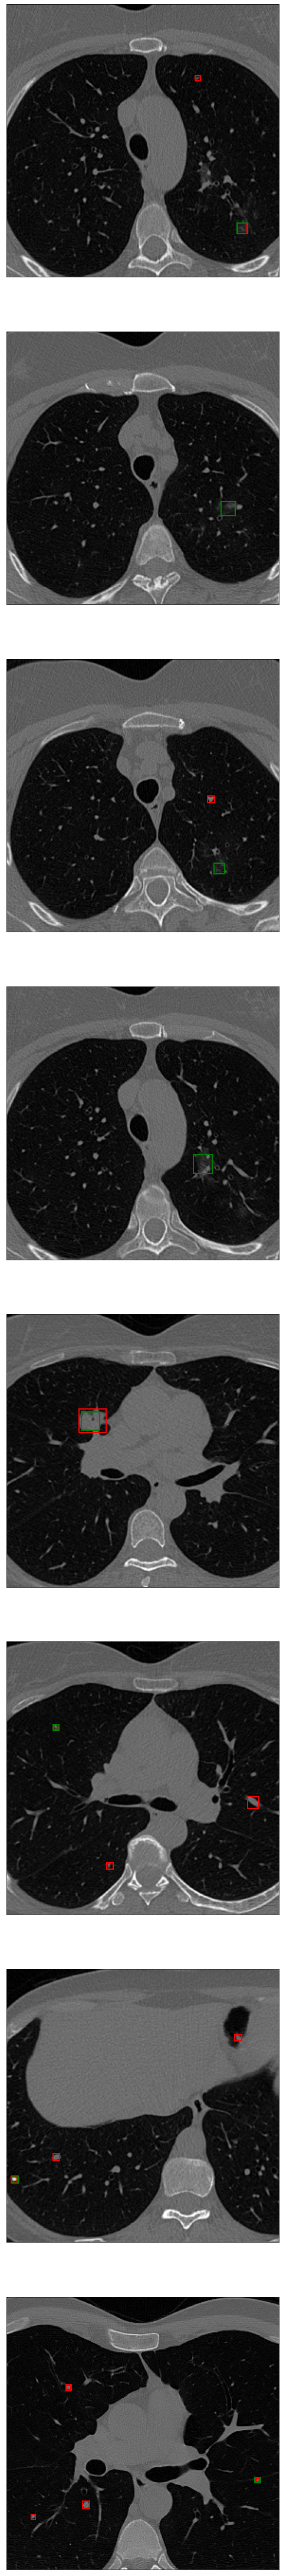

In [15]:
x, y, scanner, filepath = next(iter(dl_lndb))
x = list(i.to(device) for i in x)

print(scanner)
print(filepath)

out = model.forward(x)

fig, ax = plt.subplots(8, 1, figsize=(10, 80))

for i in range(8):
    xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[i]['boxes']]

    ax[i].imshow(x[i].detach().cpu().numpy()[0])
    for k, xy in enumerate(xywh):
        rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
        ax[i].add_patch(rect)
    for gt in y[i]['boxes']:
        rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
        ax[i].add_patch(rect)
    ax[i].set_yticks([])
    ax[i].get_xaxis().set_visible(False)

In [17]:
filepath

('/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.054',
 '/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.17418539695465656/CT.2112.145',
 '/data/dataset/external/LungTIME/PND057/1.3.12.2.1107.5.99.2.1315.4.0.2008352516954458/CT.18519.119',
 '/data/dataset/external/LungTIME/PND107/1/07_1_148.dcm',
 '/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.058',
 '/data/dataset/external/LungTIME/PND107/2/07_2_089.dcm',
 '/data/dataset/external/LungTIME/PND130/2/30_2_062.dcm',
 '/data/dataset/external/LungTIME/PND112/1/12_1_081.dcm')

In [39]:
y[-1]

{'boxes': tensor([[267.8325, 230.3856, 275.8325, 238.3856],
         [212.5719, 282.1997, 220.5719, 290.1997],
         [188.5029, 244.6546, 204.5029, 260.6546]]),
 'labels': tensor([2, 2, 2]),
 'image_id': tensor([38, 38, 38]),
 'area': tensor([ 64.,  64., 256.], dtype=torch.float64),
 'iscrowd': tensor([0, 0, 0])}

In [30]:
pyd.read_file('/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.058', force=True).ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [23]:
pd.read_csv('/project/catinous/lungnodulesfinallndb.csv').groupby(['patient_id', 'split']).count().sort_values('dataset')

dataset  scanner  image  x1  x2  y1  y2  bin_malignancy
patient_id     split                                                         
LIDC-IDRI-0207 test         1        1      1   1   1   1   1               1
LIDC-IDRI-0372 train        1        1      1   1   1   1   1               1
LIDC-IDRI-0371 val          1        1      1   1   1   1   1               1
LIDC-IDRI-0369 train        1        1      1   1   1   1   1               1
LIDC-IDRI-0363 train        1        1      1   1   1   1   1               1
...                       ...      ...    ...  ..  ..  ..  ..             ...
288            train       11       11     11  11  11  11  11              11
31             train       11       11     11  11  11  11  11              11
10             test        12       12     12  12  12  12  12              12
LIDC-IDRI-0129 base        12       12     12  12  12  12  12              12
284            train       15       15     15  15  15  15  15              15

[652 rows x 8 columns]